# Test A for inner shell varying $\beta$ and Mach Number

In order to confirm the expression I got for the Radius of curvature. I need to plot A vs $\beta$ for different Mach Number to see the behavior of A.

I already got an expression for the inner shell A: $A_{in}\equiv \frac{R_{c,in}}{R_0(1-H_0)} = \frac{3(1-H_0)}{\vert2(1-\beta^{1/2})+3H_0n\vert}$

Where $H_0=\frac{3}{4M^2+7}$ and $n =3.4\left(\frac{4M^2+1}{4M^2+19}\right)$

And for RAM pressure equilibrium $R_0=\frac{\beta^{1/2}}{1+\beta^{1/2}}$

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

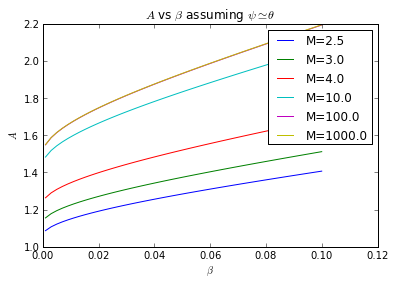

In [2]:
M = np.array([2.5,3.0,4.0,10.0,100.0,1000.0])
beta = np.linspace(0.001,0.1)
for m in M:
    H0 = 3./(4*m**2+7.)
    n = 3.4*(4*m**2+1.)/(4*m**2+19.)
    A = 3*(1-H0)/np.abs(2*(1-np.sqrt(beta))+3*H0*n)
    plt.plot(beta,A,label="M={}".format(m))
plt.legend()
plt.xlabel(r"$\beta$")
plt.ylabel(r"$A$")
plt.title(r"$A$ vs $\beta$ assuming $\psi\simeq \theta$")

Looks like the Radius of curvature are bigger with low Mach Numbers, while the expectation is the opposite. The question is if it is reasonable or my approximation is not good enough. What we can see is that $A$ converges for high $M$ (to the radius of curvature of CD). Two expanations I have in mind right now: My expectations are wrong, or my approximation applies for the "nose" of the shell. Let's try changing my assumptions while calculating $A$. Forget it, was only an algebraic error.

The new expression obtained for $A_{in}$. Mathematical steps documented in radii.pdf

$A_{in}=\left\vert \frac{9\left(1-H_0\right)}{6(\beta^{1/2}-1)+H_0[21-12\beta^{1/2}-(n+1)(13-8\beta^{1/2}+4\beta)]} \right\vert$

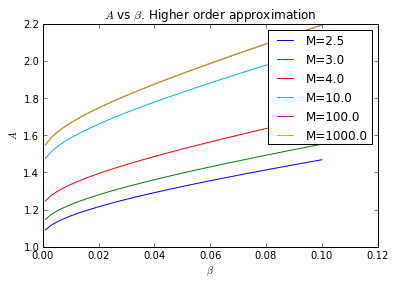

In [5]:
for m in M:
    H0 = 3./(4*m**2+7.)
    n = 3.4*(4*m**2+1.)/(4*m**2+19.)
    A2 = np.abs(9*(1-H0)/(6*np.sqrt(beta)-6+H0*(21-12*np.sqrt(beta)-(n+1)*(13-8*np.sqrt(beta)
                        +4*beta))))
    plt.plot(beta,A2,label="M={}".format(m))
plt.legend()
plt.xlabel(r"$\beta$")
plt.ylabel(r"$A$")
plt.title(r"$A$ vs $\beta$. Higher order approximation")

Let's try to measure the difference between both approximations to check if the higher order approximation worth it.

(-0.05, 0.05)

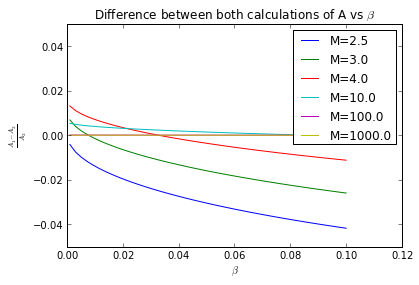

In [6]:
for m in M:
    H0 = 3./(4*m**2+7.)
    n = 3.4*(4*m**2+1.)/(4*m**2+19.)
    A = 3*(1-H0)/np.abs(2*(1-np.sqrt(beta))+3*H0*n)
    A2 = np.abs(9*(1-H0)/(6*np.sqrt(beta)-6+H0*(21-12*np.sqrt(beta)-(n+1)*(13-8*np.sqrt(beta)
                        +4*beta))))
    plt.plot(beta,(A-A2)/A2,label="M={}".format(m))
plt.legend()
plt.xlabel(r"$\beta$")
plt.ylabel(r"$\frac{A_1-A_2}{A_2}$")
plt.title(r"Difference between both calculations of A vs $\beta$")
plt.ylim(-0.05,0.05)

Looks like inside a 5% error margin, both calculations are similar.

For $R_{90}$ we have the following expressions:

$\frac{R_{90,i}}{D}=\tan\theta_{1,90,i}$

$B_i=\frac{R_{90,i}}{R_0}$

Where $i=\mathrm{isotropic,proplyd}$

$\theta_{1,90,i}=\left(Q_i\beta\right)^{1/2}$

$Q_i\left\lbrace\begin{array}{lr}
3 & \mathrm{if~isotropic}\\
2.4& \mathrm{if~proplyd}
\end{array}\right.$

And for the inner shell:

$B_{In,i} = B_i- H_0(1+\omega^2_{90,i})^{-\frac{n+1}{2}}$

$\omega_{90,i} = B_iR_0\left\lbrace 1-K_i\beta\frac{\sec^2\theta_{1,90,i}}{B_iR_0-(Q_i\beta)^{1/2}\sec^2\theta_{1,90,i}}\right\rbrace$

$K_i\left\lbrace\begin{array}{lr}
\frac{\pi}{2} & \mathrm{if~isotropic}\\
0.958512 & \mathrm{if~proplyd}
\end{array}\right.$

Test the theory with a CRW shell with $\beta=0.01$ and $M=3.0$

In [7]:
from equation6 import Shell

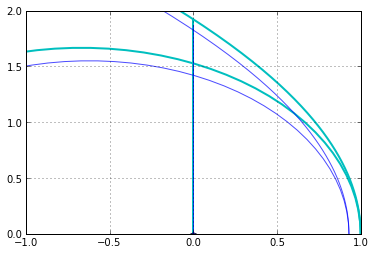

In [49]:
#Isotropic type wind
beta=0.01
M=3.0
H0 = 3./(4*M**2+7.)
n = 3.4*(4*M**2+1.)/(4*m**2+19.)
theta = np.linspace(0,np.radians(135.0))
shell = Shell(beta=beta,innertype ="isotropic")
R=shell.radius(theta)
x,y = R*np.cos(theta),R*np.sin(theta)
A = 1.5/(1.-np.sqrt(beta))
Qi=3.
th190=np.sqrt(Qi*beta)
B = np.tan(th190)/R[0]
plt.plot(x/R[0],y/[R[0]],"c",lw=2.0)
plt.plot(A*np.cos(np.linspace(0,np.pi))-(A-1),A*np.sin(np.linspace(0,np.pi)),"c",lw=2.0)
plt.plot([0.0,0.0],[0.0,B],"c",lw=2.0)
plt.plot([0.0],[0.0],"*")
#Inner shell
f=np.zeros_like(x)
f[:-1]=-np.diff(y)/np.diff(x)
f[-1]=f[-2]
alpha = np.arctan(f)
psi = theta+alpha-np.pi/2
Rin = R/R[0]-H0*np.cos(psi)**(-(n+1))
xin,yin = Rin*np.cos(theta),Rin*np.sin(theta)
Ain = 3*(1-H0)/np.abs(2*(1-np.sqrt(beta))+3*H0*n)
Ki=0.5*np.pi
sec = 1./np.cos(th190)
omega90 = B*R[0]*(1.-Ki*beta*(sec**2/(B*R[0]-np.sqrt(Qi*beta)*sec**2)))
Bin= B-H0*(1+omega90**2)**(-0.5*(n+1.))
plt.plot(xin,yin,"b",alpha=0.7)
plt.plot(Ain*np.cos(np.linspace(0,np.pi))-(Ain-(1-H0)),Ain*np.sin(np.linspace(0,np.pi)),"b",
         alpha=0.7)
plt.plot([0.0,0.0],[0.0,Bin],"b",alpha=0.7)
plt.xlim(-1.,1.)
plt.ylim(0,2)
plt.grid();

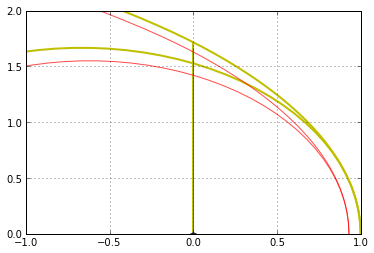

In [50]:
shell = Shell(beta=beta,innertype ="proplyd")
R=shell.radius(theta)
x,y = R*np.cos(theta),R*np.sin(theta)
A = 1.5/(1.-np.sqrt(beta))
Qi=2.4
th190=np.sqrt(Qi*beta)
B = np.tan(th190)/R[0]
plt.plot(x/R[0],y/[R[0]],"y",lw=2.0)
plt.plot(A*np.cos(np.linspace(0,np.pi))-(A-1),A*np.sin(np.linspace(0,np.pi)),"y",lw=2.0)
plt.plot([0.0,0.0],[0.0,B],"y",lw=2.0)
plt.plot([0.0],[0.0],"*")
#Inner shell
f=np.zeros_like(x)
f[:-1]=-np.diff(y)/np.diff(x)
f[-1]=f[-2]
alpha = np.arctan(f)
psi = theta+alpha-np.pi/2
Rin = R/R[0]-H0*np.cos(psi)**(-(n+1))
xin,yin = Rin*np.cos(theta),Rin*np.sin(theta)
Ain = 3*(1-H0)/np.abs(2*(1-np.sqrt(beta))+3*H0*n)
Ki= 0.958512
sec = 1./np.cos(th190)
omega90 = B*R[0]*(1.-Ki*beta*(sec**2/(B*R[0]-np.sqrt(Qi*beta)*sec**2)))
Bin= B-H0*(1+omega90**2)**(-0.5*(n+1.))
plt.plot(xin,yin,"r",alpha=0.7)
plt.plot(Ain*np.cos(np.linspace(0,np.pi))-(Ain-(1-H0)),Ain*np.sin(np.linspace(0,np.pi)),"r",
         alpha=0.7)
plt.plot([0.0,0.0],[0.0,Bin],"r",alpha=0.7)
plt.xlim(-1.,1.)
plt.ylim(0,2)
plt.grid();

Note that little excess in $B_{in}$. I don't know if it is due to an algebraic error or due to the approximations are not so good at $\theta=\frac{\pi}{2}$